In [ ]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
import numpy as np

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
df = results.copy()

df['responsibilities'] = df['responsibilities'].replace(np.nan, '없음')
df['requirements'] = df['requirements'].replace(np.nan, '없음')
df['preference'] = df['preference'].replace(np.nan, '없음')
df.head()

In [ ]:
texts = df['responsibilities'].values.tolist()
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수
    max_length = 15, # 단어의 최대 길이
    verbose = True
)

beta = 0.85
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

for word, r in sorted(keywords.items(), key = lambda x: x[1], reverse = True)[:50] :
    print((word, r))

scan vocabs ... 
num vocabs = 3759
done
('데이터', 38.79138343989203)
('분석', 26.406681365895512)
('and', 26.285096352116366)
('위한', 20.102570538943116)
('to', 10.713047408261692)
('서비스', 10.181783354033533)
('대한', 8.581010484080494)
('기반', 8.483690466399645)
('통해', 8.314134518295552)
('있는', 8.097352124547818)
('통한', 7.925344632856201)
('비즈니스', 7.88720449644187)
('도출', 7.4018416910898805)
('인사이트', 7.382270540589836)
('지표', 7.023295450030961)
('다양한', 6.761655112215048)
('of', 6.713095600960648)
('the', 6.439552361314302)
('개선', 6.427118721689868)
('의사결정을', 6.40481566372737)
('이를', 6.149509241618107)
('설계', 5.604738118874747)
('결과를', 5.267818107101231)
('client', 5.061177036635687)
('가설을', 4.856322100139674)
('필요한', 4.723556034287158)
('프로', 4.564037446820592)
('A/B', 4.5443807257787645)
('KPI', 4.498445096532378)
('위해', 4.493987170440159)
('제공', 4.370090856199159)
('in', 4.283505341384454)
('고객', 4.282755622546088)
('있도록', 4.1900014502872365)
('테스트', 4.084414406315882)
('Da', 4.001162643799

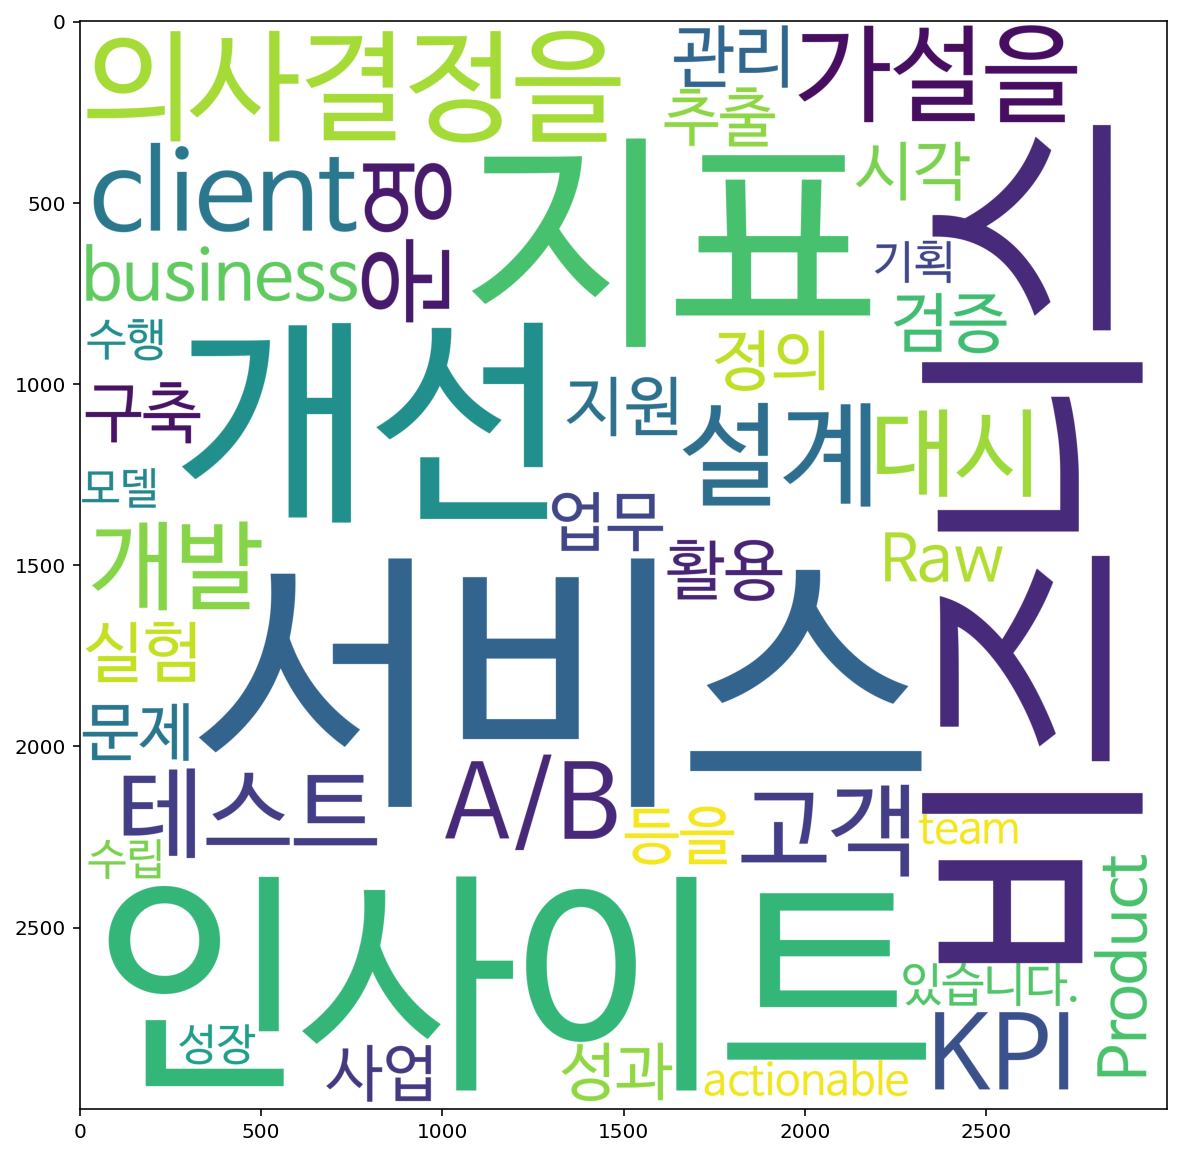

In [ ]:
stopwords = {'on', 'for', '등과', '있습니다', '데이터', '분석', 'and', '위한', 'to', '대한', '기반', '통해', '있는', '통한', '도출', '다양한', 'of', 'the', '이를', '필요한', '결과를', '프로', '위해', '제공', 'in', '있도록', 'Da', '함께', 'on' 'for', '관련', '주요'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(keywords.items(), key=lambda x:-x[1])[:70] if not (word in stopwords)} 

wc = WordCloud(font_path=fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250, background_color = 'white')
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize = (10, 10))
plt.imshow(gen)


In [ ]:
texts = df['requirements'].values.tolist()
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수
    max_length = 15, # 단어의 최대 길이
    verbose = True
)

beta = 0.85
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

for word, r in sorted(keywords.items(), key = lambda x: x[1], reverse = True)[:50] :
    print((word, r))

scan vocabs ... 
num vocabs = 3237
done
('데이터', 29.595277704482253)
('분석', 28.50536111949859)
('대한', 13.99606857191241)
('and', 12.717137068222641)
('경험', 12.515395070206642)
('SQL', 7.856106213179386)
('있는', 7.5340585617101405)
('이상', 7.5201846205940335)
('in', 6.905038351531536)
('Cohort,', 6.691774440122319)
('활용', 6.630256435065437)
('등)', 6.40043621276972)
('이해', 6.079976115564825)
('능력', 6.054870833842909)
('위한', 5.856907456262247)
('관련', 5.84920111269167)
('of', 5.625092944406588)
('서비스', 5.619736528936009)
('통해', 5.586535866139665)
('to', 5.348872906273909)
('사용', 4.944841046796621)
('있으신', 4.722232524075016)
('Analytics,', 4.684418919027049)
('업무', 4.5548643750268365)
('결과를', 4.429288000335287)
('문제', 4.3720790646926035)
('비즈니스', 4.243743296271374)
('커뮤니케이션', 4.173391664624985)
('다양한', 4.157644043148582)
('R,', 4.061236944835831)
('등의', 4.002228185231678)
('경력', 3.8502336137079745)
('A/B', 3.839884879481287)
('역량', 3.7468679664057993)
('Python', 3.682635036610542)
('원활한', 3.62

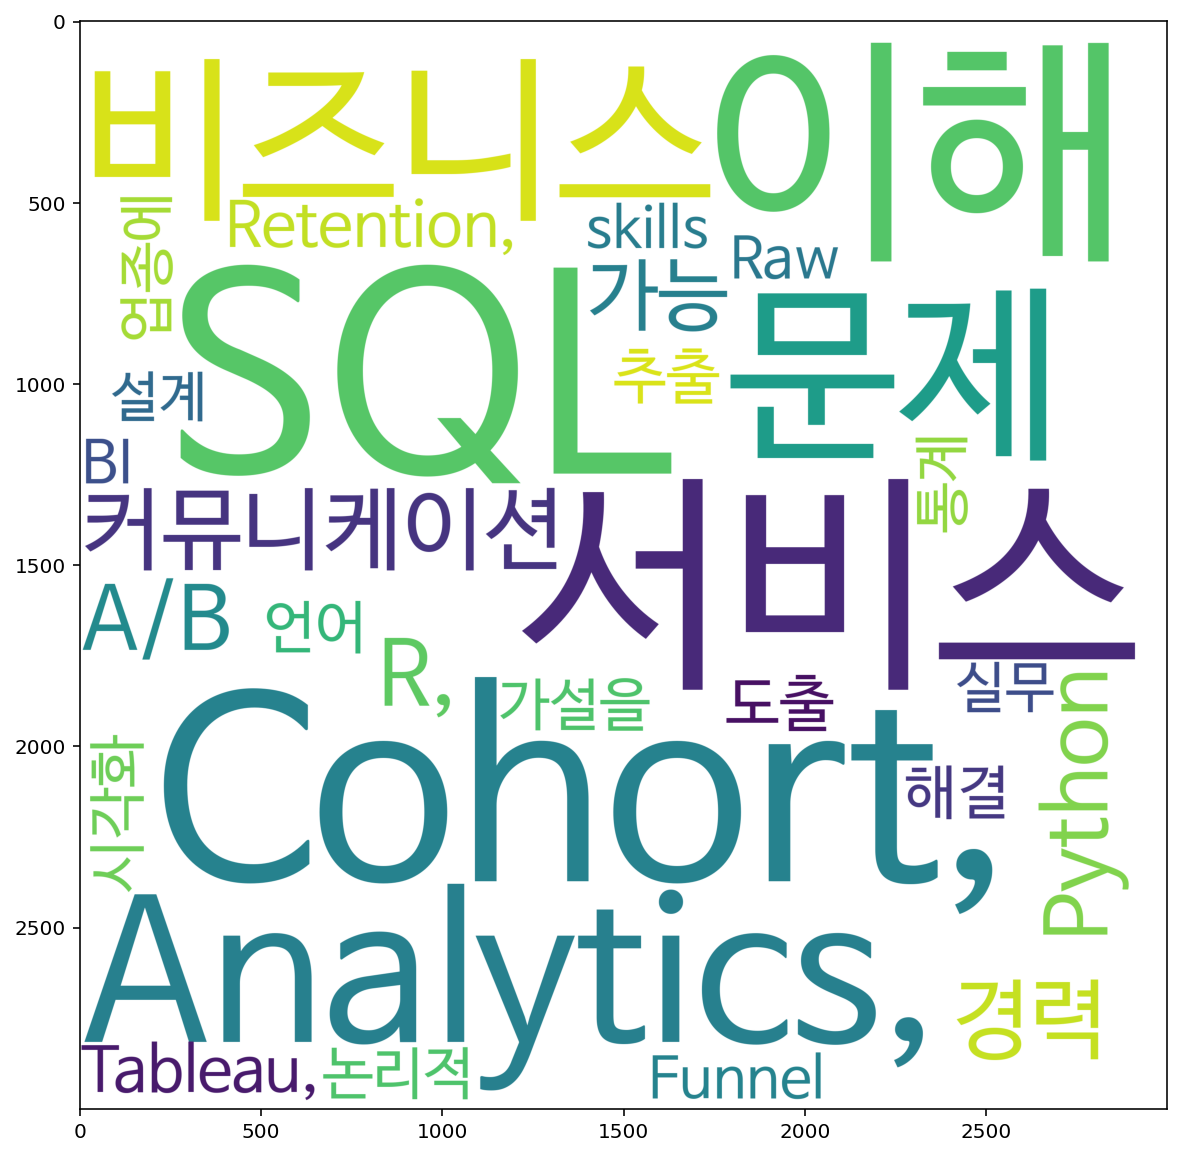

In [ ]:
stopwords = {'3년', '등을', '분이면', '분을', '위해', '프로', '방법', 'Da', '데이터', '분석', '대한', 'and', '경험', '있는', '이상', 'in', '활용', '등)', '능력', '위한', '관련', 'of', '통해', 'to', '사용', '있으신', '업무', '결과를', '다양한', '등의', '역량', '원활한', '기반', '인사이트를', '보유', '또는', 'or', '통한', '바탕으로', '쉽게'}
passwords = {word:score for word, score in sorted(keywords.items(), key=lambda x:-x[1])[:70] if not (word in stopwords)}  

wc = WordCloud(font_path=fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250, background_color = 'white')
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize = (10, 10))
plt.imshow(gen)

scan vocabs ... 
num vocabs = 2585
done
('데이터', 25.36169243172344)
('경험', 20.09531595166319)
('분석', 17.643215880028244)
('대한', 13.849034452186801)
('관련', 12.025503880340494)
('Data', 10.759423737363077)
('등)', 9.143204940545822)
('활용', 7.895688752517382)
('있으', 7.0628406854171555)
('Google', 6.595200097498227)
('또는', 6.284446679404098)
('Tableau,', 6.268539352470239)
('사용', 6.267669853130576)
('등의', 5.666358688696166)
('서비스', 5.4386580751680516)
('이해', 5.241379646549858)
('있는', 4.926007017024764)
('시각화', 4.892516788903511)
('혹은', 4.549626047445786)
('통계', 4.462077610198094)
('구축', 4.168118260536508)
('Fit', 4.10689234541606)
('프로', 4.034658325965634)
('Analytics,', 3.9630690784099163)
('R,', 3.9062643816128757)
('업무', 3.641686687497838)
('등을', 3.5927898769637374)
('기반', 3.5182281299363307)
('분야', 3.5143003568307103)
('위한', 3.440862628171005)
('보유', 3.3128141109647617)
('통해', 3.2599585117205216)
('Cohort,', 3.2007126678770503)
('A/B', 3.1880963867580743)
('Python', 3.085382530227487)
('

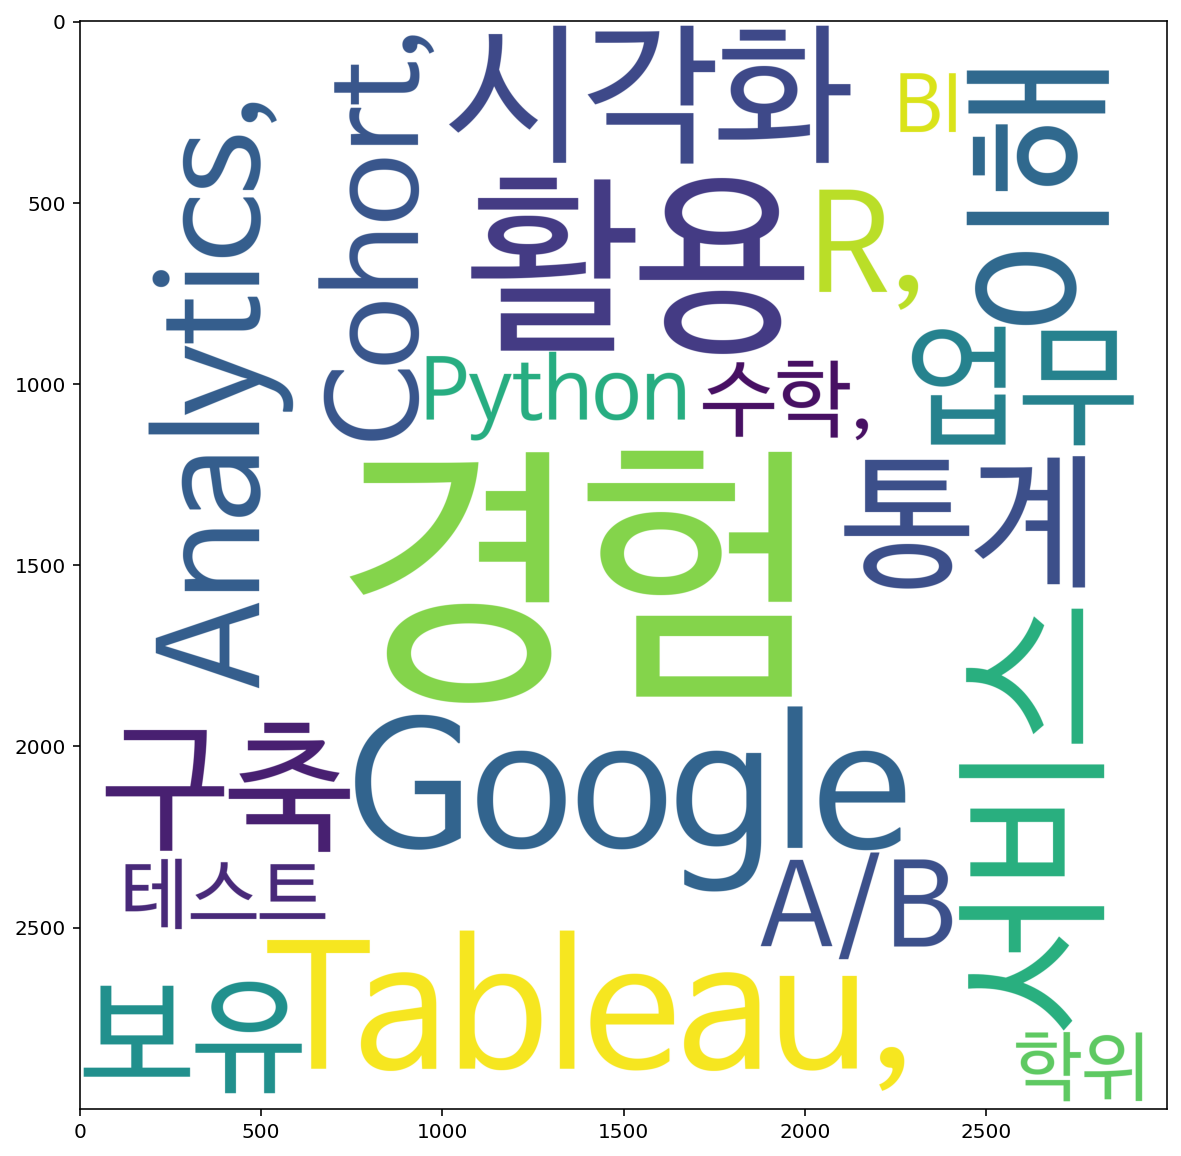

In [ ]:
texts = df['preference'].values.tolist()
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수
    max_length = 15, # 단어의 최대 길이
    verbose = True
)

beta = 0.85
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

for word, r in sorted(keywords.items(), key = lambda x: x[1], reverse = True)[:50] :
    print((word, r))

stopwords = {'등)', '이상', '데이터', '분석', '대한', '관련', 'Data', '등', '있으', '또는', '사용', '등의', '있는', '혹은', 'Fit', '프로', '등을', '기반', '분야', '위한', '통해', '다양한', '좋습니다'}
passwords = {word:score for word, score in sorted(keywords.items(), key=lambda x:-x[1])[:40] if not (word in stopwords)} 

wc = WordCloud(font_path=fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250, background_color = 'white')
gen = wc.generate_from_frequencies(passwords)
plt.figure(figsize = (10, 10))
plt.imshow(gen)